In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import drive
import shutil
from sklearn.decomposition import PCA

In [2]:
# Mount Google Drive (if not already mounted)
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Path ke dataset
train_path = "/content/drive/My Drive/PCD/Ambulance_Car/Train"
label_path = "/content/drive/My Drive/PCD/Ambulance_Car/Label"

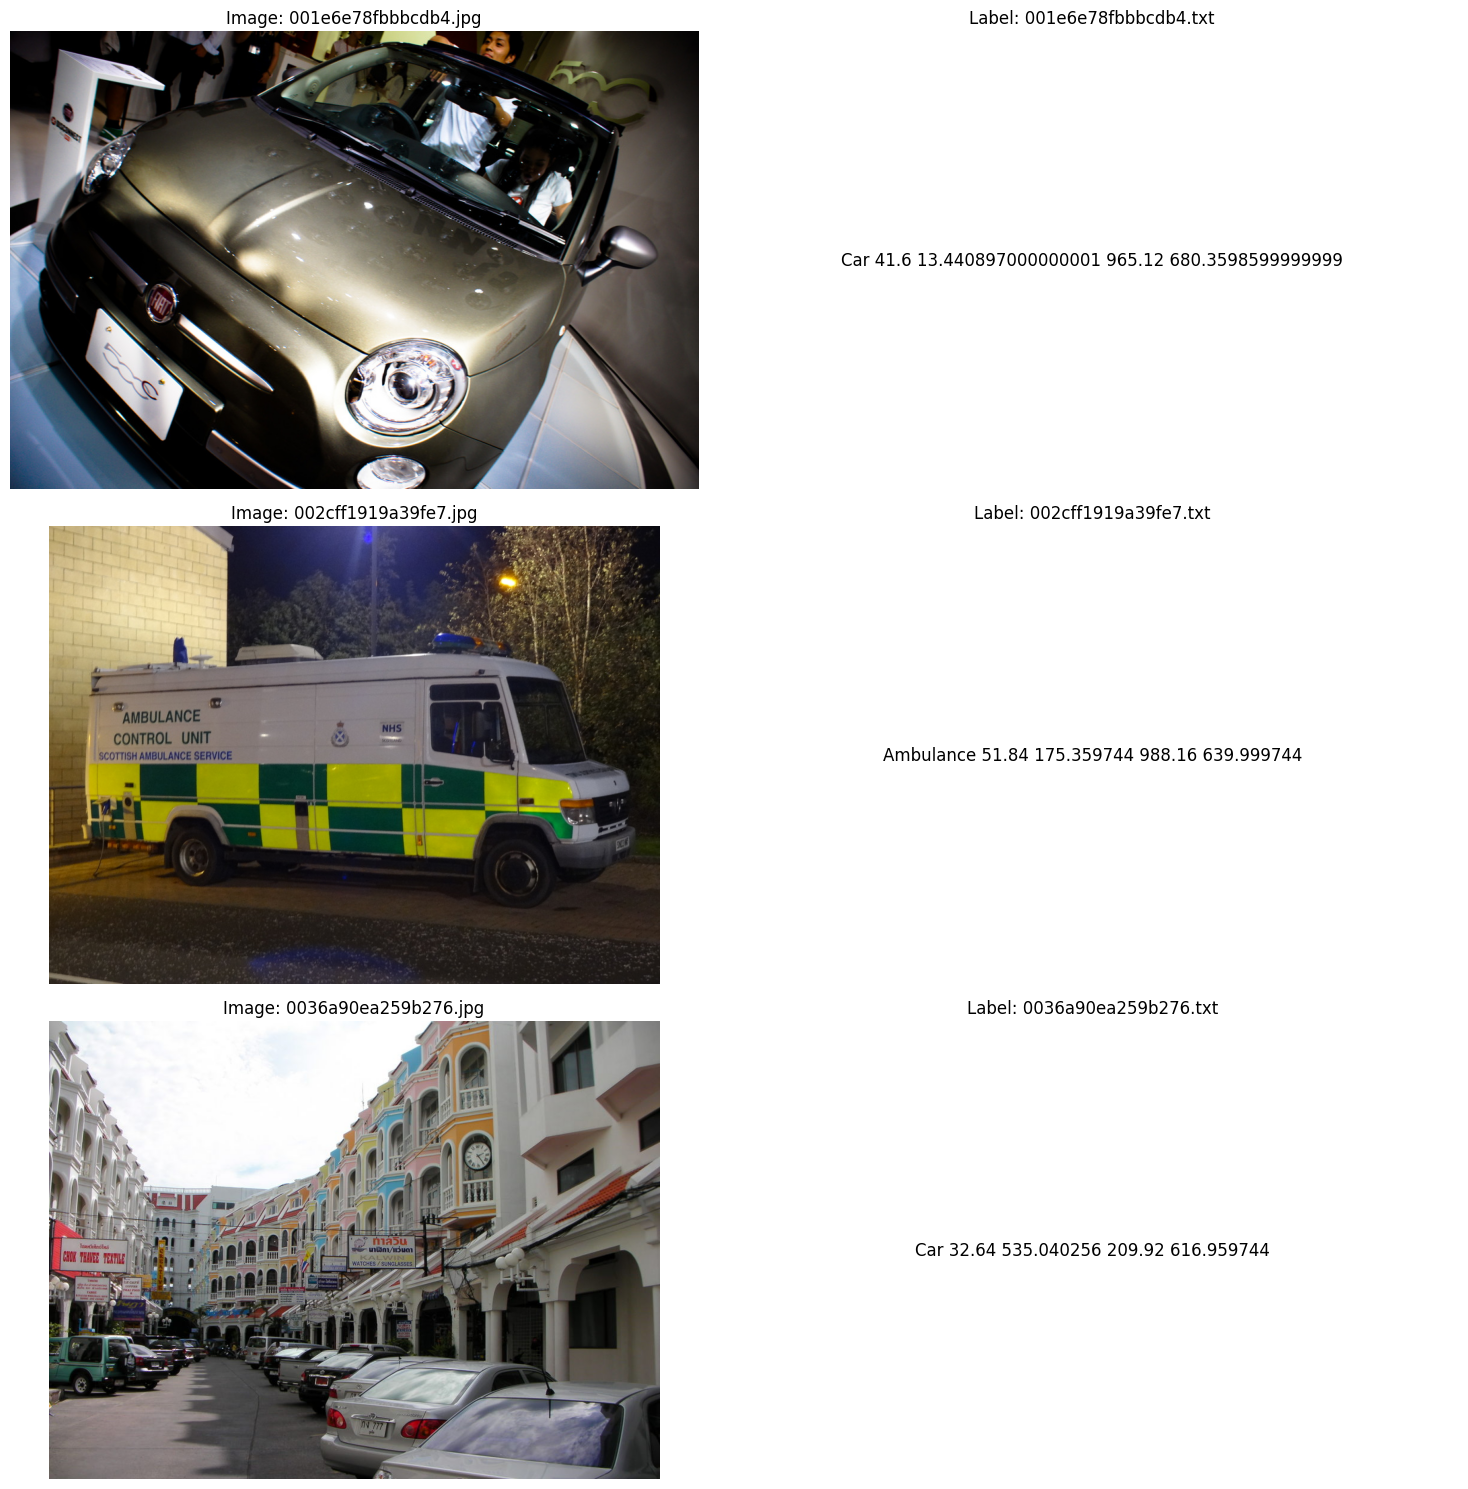

In [4]:
def plot_images_with_labels(train_dir, label_dir, num_images=3):
    """Plots sample images with their corresponding labels.

    Args:
      train_dir: Path to the directory containing training images.
      label_dir: Path to the directory containing labels (text files).
      num_images: The number of images to display.
    """

    image_files = sorted([f for f in os.listdir(train_dir) if os.path.isfile(os.path.join(train_dir, f))])
    label_files = sorted([f for f in os.listdir(label_dir) if os.path.isfile(os.path.join(label_dir, f))])

    num_images_to_show = min(num_images, len(image_files), len(label_files))

    plt.figure(figsize=(15, 5 * num_images_to_show)) # Adjust figure size

    for i in range(num_images_to_show):
        image_path = os.path.join(train_dir, image_files[i])
        label_path = os.path.join(label_dir, label_files[i])

        try:
            img = mpimg.imread(image_path)
            with open(label_path, 'r') as f:  # Read label from corresponding file
                label = f.readline().strip() # Assuming one label per line

            plt.subplot(num_images_to_show, 2, 2*i + 1)  # Subplot for image
            plt.imshow(img)
            plt.title(f"Image: {image_files[i]}")
            plt.axis('off')

            plt.subplot(num_images_to_show, 2, 2*i + 2)  # Subplot for label
            plt.text(0.5, 0.5, label, ha='center', va='center', fontsize=12)
            plt.title(f"Label: {label_files[i]}")
            plt.axis('off')

        except Exception as e:
            print(f"Error processing image/label {image_files[i]}: {e}")

    plt.tight_layout()
    plt.show()

# Check if directories exist
if not os.path.exists(train_path) or not os.path.exists(label_path):
    print(f"Error: Train or label directory not found.")
else:
    plot_images_with_labels(train_path, label_path)

In [5]:
# Path to the dataset and label directories
new_train_path = "/content/drive/My Drive/PCD/Ambulance_Car/Renamed_Train"


def rename_images_with_labels(train_dir, label_dir, new_train_dir):
    """Renames images based on their corresponding labels, simplifying to 'car' or 'ambulance'.

    Args:
      train_dir: Path to the directory containing training images.
      label_dir: Path to the directory containing labels (text files).
      new_train_dir: Path to the directory where renamed images will be saved.
    """
    image_files = sorted([f for f in os.listdir(train_dir) if os.path.isfile(os.path.join(train_dir, f))])
    label_files = sorted([f for f in os.listdir(label_dir) if os.path.isfile(os.path.join(label_dir, f))])

    # Create the new directory if it doesn't exist
    os.makedirs(new_train_dir, exist_ok=True)

    num_files = min(len(image_files), len(label_files))

    for i in range(num_files):
        image_path = os.path.join(train_dir, image_files[i])
        label_path = os.path.join(label_dir, label_files[i])

        try:
            with open(label_path, 'r') as f:
                label = f.readline().strip()
                # Simplify labels
                label = "car" if "car" in label.lower() else "ambulance"


            # Extract file extension from original name
            _, ext = os.path.splitext(image_files[i])

            # Construct new filename
            new_filename = f"{label}_{i}{ext}"  # Add an index for uniqueness
            new_image_path = os.path.join(new_train_dir, new_filename)

            # Copy and rename the file
            shutil.copy2(image_path, new_image_path)  # shutil.copy2 preserves metadata

            print(f"Renamed '{image_files[i]}' to '{new_filename}'")
        except Exception as e:
            print(f"Error processing image/label {image_files[i]}: {e}")

# Check if directories exist
if not os.path.exists(train_path) or not os.path.exists(label_path):
    print(f"Error: Train or label directory not found.")
else:
    rename_images_with_labels(train_path, label_path, new_train_path)

Renamed '001e6e78fbbbcdb4.jpg' to 'car_0.jpg'
Renamed '002cff1919a39fe7.jpg' to 'ambulance_1.jpg'
Renamed '0036a90ea259b276.jpg' to 'car_2.jpg'
Renamed '0037710c3d02f369.jpg' to 'car_3.jpg'
Renamed '003f00b07e582283.jpg' to 'car_4.jpg'
Renamed '00510a8d1b746d21.jpg' to 'ambulance_5.jpg'
Renamed '0053860714da4340.jpg' to 'ambulance_6.jpg'
Renamed '008fb317eb17858b.jpg' to 'ambulance_7.jpg'
Renamed '009ba461026271c3.jpg' to 'ambulance_8.jpg'
Renamed '00aeb6aad375b581.jpg' to 'car_9.jpg'
Renamed '00b83a965bfdf05c.jpg' to 'ambulance_10.jpg'
Renamed '00cf36607bf15e80.jpg' to 'ambulance_11.jpg'
Renamed '00dea1edf14f09ab.jpg' to 'ambulance_12.jpg'
Renamed '00e0422e47cdbeb7.jpg' to 'ambulance_13.jpg'
Renamed '00e2d9121adc0c20.jpg' to 'ambulance_14.jpg'
Renamed '00ebe911feb4244e.jpg' to 'ambulance_15.jpg'
Renamed '00fbeea1df0767a8.jpg' to 'car_16.jpg'
Renamed '014c195652f21f2c.jpg' to 'car_17.jpg'
Renamed '0156edf0f33e59d3.jpg' to 'car_18.jpg'
Renamed '0158307c4ad94b38.jpg' to 'ambulance_19.jpg

Number of images loaded: 1138
Number of labels loaded: 1138


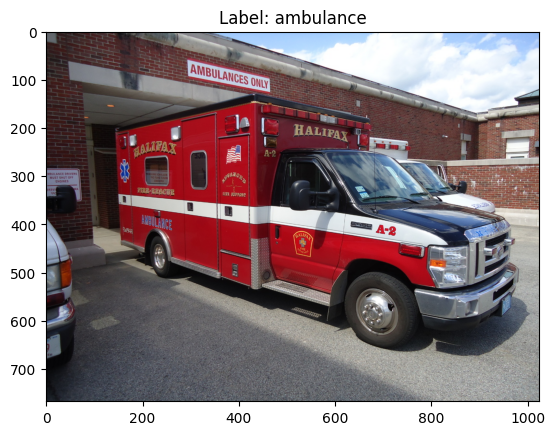

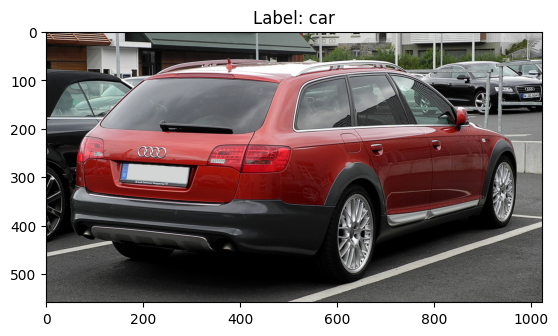

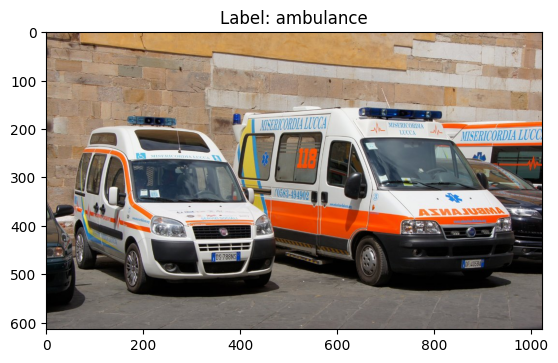

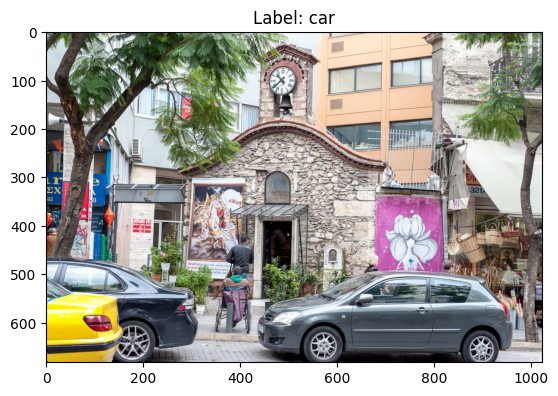

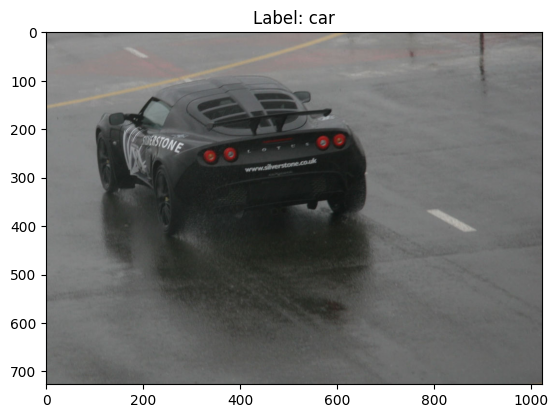

In [6]:
# Path to the dataset and label directories
train_path = "/content/drive/My Drive/PCD/Ambulance_Car/Renamed_Train"


def load_images_and_labels(directory):
    """Loads images from a directory and extracts labels from filenames.

    Args:
      directory: Path to the directory containing images.

    Returns:
      images: A list of image arrays.
      labels: A list of corresponding labels.
    """

    images = []
    labels = []
    image_files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

    for filename in image_files:
        try:
            image_path = os.path.join(directory, filename)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            if image is not None:  # Check if image loaded successfully
                images.append(image)
                label = filename.split('_')[0]  # Extract label from filename
                labels.append(label)
        except Exception as e:
            print(f"Error loading or processing image: {filename}, Error: {e}")

    return images, labels


# Load images and labels
images, labels = load_images_and_labels(train_path)

# Check if images and labels were loaded correctly
if not images or not labels:
    print("Error: No images or labels were loaded. Check your paths and data.")
else:
    # Continue with your image processing and classification
    print(f"Number of images loaded: {len(images)}")
    print(f"Number of labels loaded: {len(labels)}")

    # Example: Display the first few images
    for i in range(min(5, len(images))): # Display the first 5 images
      plt.imshow(images[i])
      plt.title(f"Label: {labels[i]}")
      plt.show()

In [7]:
# Path ke dataset (adjust these paths if necessary)
data_dir = "/content/drive/My Drive/PCD/Ambulance_Car/Renamed_Train"

images = []
labels = []

for filename in os.listdir(data_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Add more extensions if needed
        img_path = os.path.join(data_dir, filename)
        img = cv2.imread(img_path)
        if img is not None:  # Check if image loaded successfully
            img = cv2.resize(img, (64, 64)) # Resize image
            images.append(img)

            # Extract label from filename (assuming filename format: label_index.jpg)
            label = filename.split('_')[0]
            labels.append(label)
        else:
            print(f"Error loading image: {img_path}")


images = np.array(images)
labels = np.array(labels)

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

print("Data Split:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Further processing (flattening, feature extraction, model training) would go here.


Data Split:
X_train shape: (910, 64, 64, 3)
X_test shape: (228, 64, 64, 3)
y_train shape: (910,)
y_test shape: (228,)


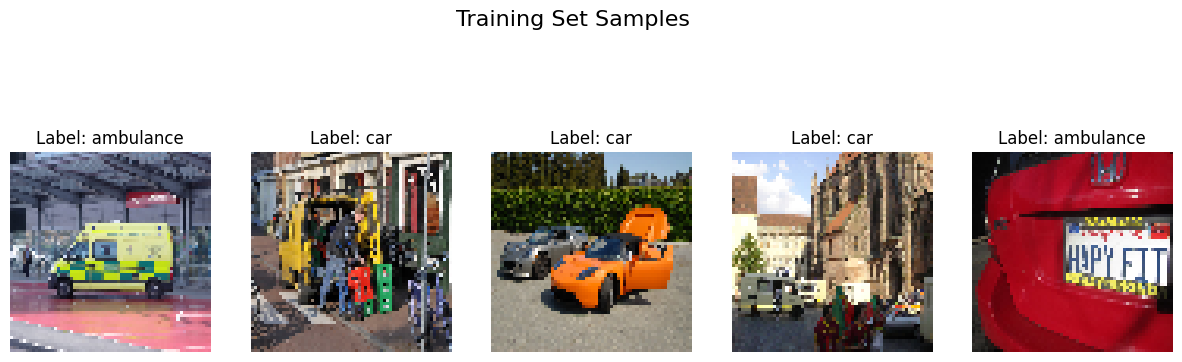

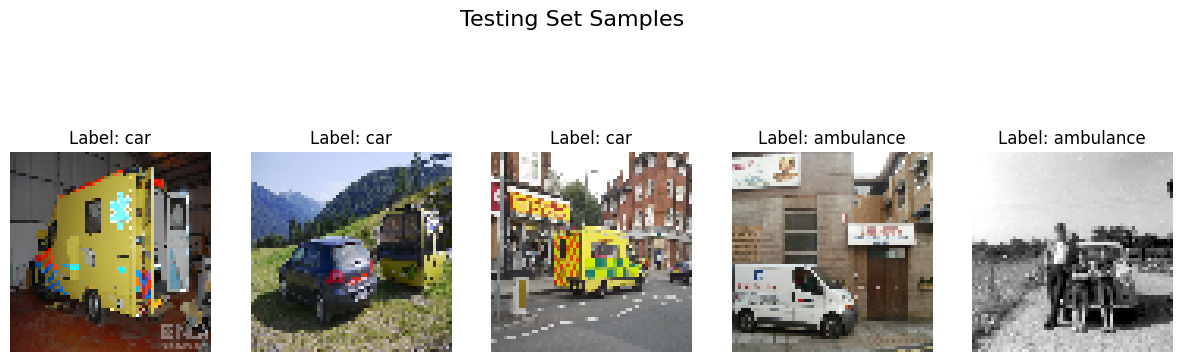

In [8]:
# Function to display images with labels
def display_dataset_samples(images, labels, label_encoder, title, num_samples=5):
    """
    Displays a set of images with their labels.

    Args:
        images: Array of images.
        labels: Array of encoded labels.
        label_encoder: The label encoder to decode labels.
        title: Title of the display.
        num_samples: Number of samples to display.
    """
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display
        plt.title(f"Label: {label_encoder.inverse_transform([labels[i]])[0]}")
        plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.show()

# Display a few samples from the training set
display_dataset_samples(X_train, y_train, label_encoder, "Training Set Samples", num_samples=5)

# Display a few samples from the testing set
display_dataset_samples(X_test, y_test, label_encoder, "Testing Set Samples", num_samples=5)

In [9]:
# ekualisasi histogram yang diikuti dengan median filtering dengan ukuran kernel sebesar 3, menghasilkan citra dengan kontras yang lebih baik dan derau (noise) yang tereduksi.

import cv2

def enhance_image(image_path):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the image was loaded successfully
    if img is None:
        print(f"Error: Could not open or read image {image_path}")
        return None

    # Histogram equalization
    equ = cv2.equalizeHist(img)

    # Median filtering
    median = cv2.medianBlur(equ, 3)

    return median

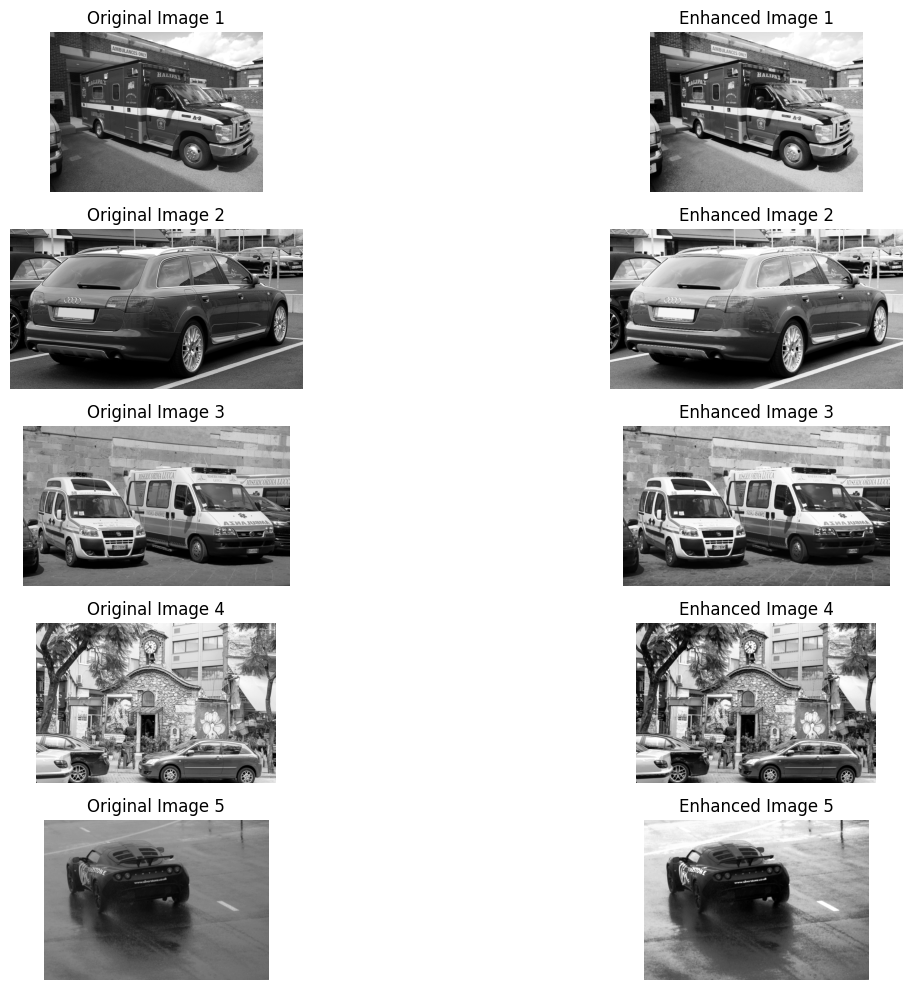

In [10]:

def show_enhanced_images(image_paths, num_samples=5):
    """
    Display original and enhanced images for comparison.

    Args:
        image_paths: List of image file paths.
        num_samples: Number of images to display.
    """
    plt.figure(figsize=(15, 10))

    for i, image_path in enumerate(image_paths[:num_samples]):
        # Load original image
        original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        enhanced_img = enhance_image(image_path)

        if original_img is not None and enhanced_img is not None:
            # Display original image
            plt.subplot(num_samples, 2, i * 2 + 1)
            plt.imshow(original_img, cmap='gray')
            plt.title(f"Original Image {i + 1}")
            plt.axis('off')

            # Display enhanced image
            plt.subplot(num_samples, 2, i * 2 + 2)
            plt.imshow(enhanced_img, cmap='gray')
            plt.title(f"Enhanced Image {i + 1}")
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage
data_dir = "/content/drive/My Drive/PCD/Ambulance_Car/Renamed_Train"
image_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Display original and enhanced images for 5 samples
show_enhanced_images(image_files, num_samples=5)

In [18]:
!pip install scikit-image

Data Split:
X_train shape: (910, 64, 64, 3)
X_test shape: (228, 64, 64, 3)
y_train shape: (910,)
y_test shape: (228,)


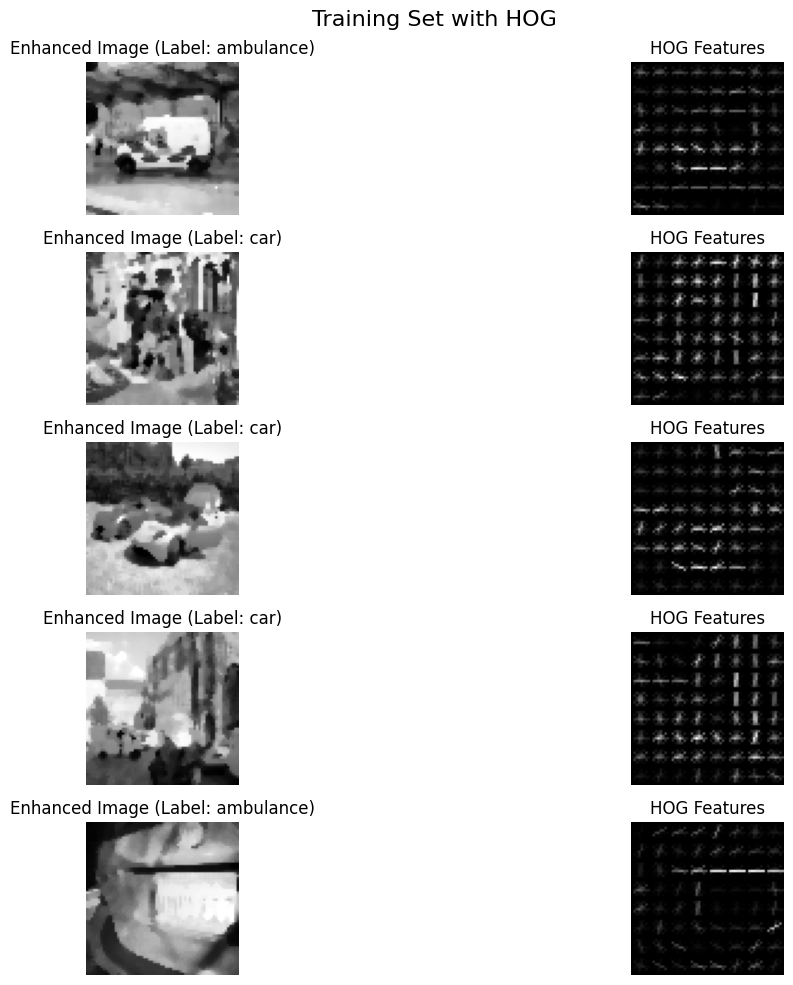

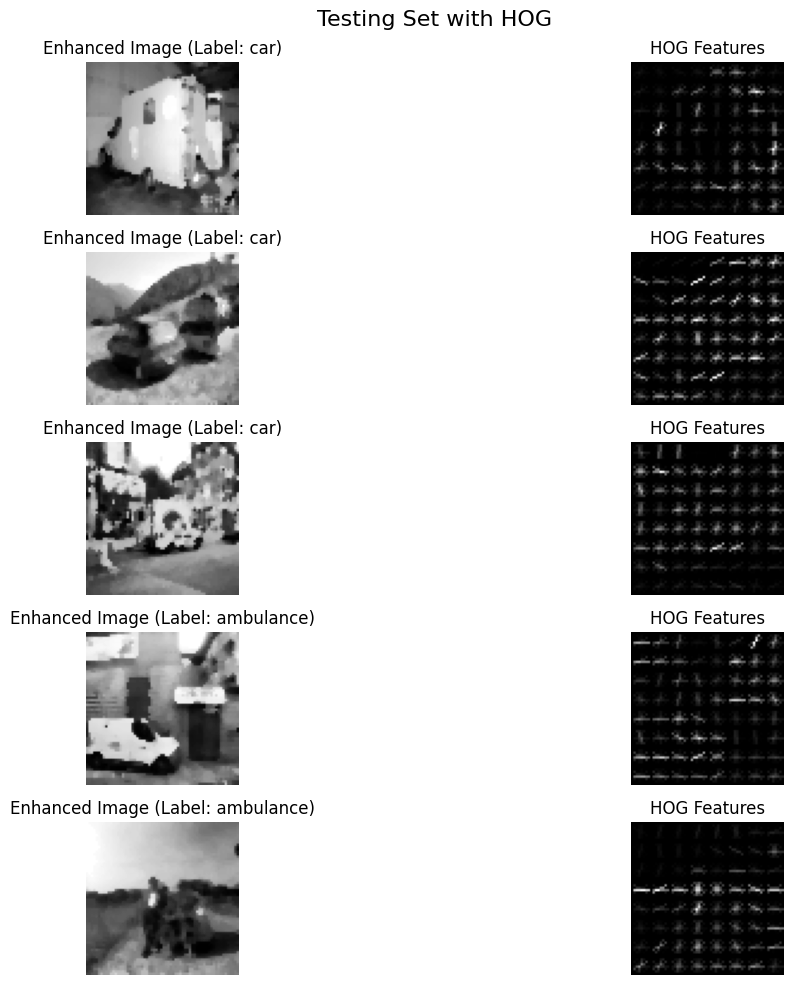

HOG Features Extracted:
X_train_hog shape: (910, 1764)
X_test_hog shape: (228, 1764)


In [24]:
# 1. Memuat Dataset dan Membagi Data
def load_and_split_data(data_dir, test_size=0.2):
    images = []
    labels = []

    for filename in os.listdir(data_dir):
        if filename.endswith(('.jpg', '.jpeg', '.png')):  # Memastikan format gambar
            img_path = os.path.join(data_dir, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (64, 64))  # Resize citra
                images.append(img)

                # Mengambil label dari nama file (format: label_index.jpg)
                label = filename.split('_')[0]
                labels.append(label)
            else:
                print(f"Error loading image: {img_path}")

    images = np.array(images)
    labels = np.array(labels)

    # Encode label menjadi nilai numerik
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)

    # Membagi data menjadi data latih dan uji
    X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=test_size, random_state=42)

    print("Data Split:")
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)

    return X_train, X_test, y_train, y_test, label_encoder

# 2. Meningkatkan Kualitas Citra
def enhance_images(images):
    enhanced_images = []
    for img in images:
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Ubah ke grayscale
        equ = cv2.equalizeHist(gray_img)  # Ekualisasi histogram
        median = cv2.medianBlur(equ, 3)  # Median filtering
        enhanced_images.append(median)
    return np.array(enhanced_images)

# 3. Ekstraksi Fitur Menggunakan HOG
def extract_hog_features(images):
    hog_features = []
    for img in images:
        # Periksa apakah gambar grayscale atau berwarna
        if len(img.shape) == 2:  # Grayscale
            features = hog(
                img,
                orientations=9,
                pixels_per_cell=(8, 8),
                cells_per_block=(2, 2),
                block_norm='L2-Hys',
                visualize=False,
            )
        else:  # Gambar berwarna, perlu menggunakan channel_axis
            features = hog(
                img,
                orientations=9,
                pixels_per_cell=(8, 8),
                cells_per_block=(2, 2),
                block_norm='L2-Hys',
                visualize=False,
                channel_axis=-1  # Axis terakhir adalah channel
            )

        hog_features.append(features)
    return np.array(hog_features)

# 4. Menampilkan Hasil
def show_process_with_hog(images, labels, label_encoder, title, num_samples=5):
    plt.figure(figsize=(15, 10))
    for i in range(num_samples):
        enhanced_img = images[i]

        # Periksa apakah gambar grayscale atau berwarna
        if len(enhanced_img.shape) == 2:
            _, hog_visualization = hog(
                enhanced_img,
                orientations=9,
                pixels_per_cell=(8, 8),
                cells_per_block=(2, 2),
                block_norm='L2-Hys',
                visualize=True,
            )
        else:  # Gambar berwarna, perlu menggunakan channel_axis
            _, hog_visualization = hog(
                enhanced_img,
                orientations=9,
                pixels_per_cell=(8, 8),
                cells_per_block=(2, 2),
                block_norm='L2-Hys',
                visualize=True,
                channel_axis=-1
            )

        # Tampilkan citra yang telah ditingkatkan kualitasnya
        plt.subplot(num_samples, 2, i * 2 + 1)
        plt.imshow(enhanced_img, cmap='gray')
        plt.title(f"Enhanced Image (Label: {label_encoder.inverse_transform([labels[i]])[0]})")
        plt.axis('off')

        # Tampilkan visualisasi HOG
        plt.subplot(num_samples, 2, i * 2 + 2)
        plt.imshow(hog_visualization, cmap='gray')
        plt.title("HOG Features")
        plt.axis('off')

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Jalankan Semua Proses
data_dir = "/content/drive/My Drive/PCD/Ambulance_Car/Renamed_Train"
X_train, X_test, y_train, y_test, label_encoder = load_and_split_data(data_dir)

# Tingkatkan kualitas citra
X_train_enhanced = enhance_images(X_train)
X_test_enhanced = enhance_images(X_test)

# Ekstraksi fitur HOG
X_train_hog = extract_hog_features(X_train_enhanced)
X_test_hog = extract_hog_features(X_test_enhanced)

# Tampilkan hasil dari data latih
show_process_with_hog(X_train_enhanced, y_train, label_encoder, "Training Set with HOG", num_samples=5)

# Tampilkan hasil dari data uji
show_process_with_hog(X_test_enhanced, y_test, label_encoder, "Testing Set with HOG", num_samples=5)

print("HOG Features Extracted:")
print("X_train_hog shape:", X_train_hog.shape)
print("X_test_hog shape:", X_test_hog.shape)

In [21]:
# Reduksi dimensi dilakukan menggunakan pendekatan PCA dari hasil ekstraksi ciri HOG

import cv2
import numpy as np
from sklearn.decomposition import PCA

def perform_pca(hog_features, n_components=0.95):
    """
    Performs PCA dimensionality reduction on HOG features.

    Args:
        hog_features: A NumPy array of HOG features, where each row is a feature vector.
        n_components: The number of principal components to keep.
                      If a float between 0 and 1, it represents the variance ratio to retain.

    Returns:
        A NumPy array of reduced HOG features.
    """

    pca = PCA(n_components=n_components, random_state=42)  # Use random_state for reproducibility
    reduced_features = pca.fit_transform(hog_features)
    print("Original HOG features shape:", hog_features.shape)
    # Corrected line: using reduced_features instead of reduced_hog_features
    print("Reduced HOG features shape:", reduced_features.shape)
    #removed as histogram has not been defined
    #print(f"histogram shape: {np.array([histogram]).shape}")
    print("Explained variance ratio:", pca.explained_variance_ratio_)
    print("Sum of explained variance ratio:", np.sum(pca.explained_variance_ratio_))

    return reduced_features

# Example usage (assuming 'features' contains your HOG features):
# Replace this with your actual HOG feature extraction

# Example HOG features (replace with your actual data)
# This is just a placeholder; you need to generate actual HOG features
num_samples = len(images)  # Assuming 'images' is your list of images
hog_features = np.random.rand(num_samples, 1000) # Example: 1000 features per image


# Perform PCA
reduced_hog_features = perform_pca(hog_features)

Original HOG features shape: (1138, 1000)
Reduced HOG features shape: (1138, 648)
Explained variance ratio: [0.00371159 0.0036945  0.00365278 0.0036111  0.00360173 0.0035514
 0.00350942 0.00346761 0.00346328 0.0034611  0.00345334 0.00344878
 0.00340009 0.0033861  0.00337953 0.00336205 0.0033345  0.00332625
 0.00330441 0.00329236 0.00327799 0.00325622 0.00325003 0.0032236
 0.00320957 0.00319828 0.00319293 0.00318665 0.00317423 0.00316898
 0.00314085 0.00313324 0.00311583 0.00310913 0.00309616 0.00309188
 0.003075   0.00306884 0.00306211 0.00305881 0.00302531 0.00301927
 0.00300943 0.00299791 0.00298485 0.00297189 0.00296455 0.0029554
 0.00295116 0.00293683 0.00293432 0.00292433 0.00290899 0.00289834
 0.00288054 0.00286749 0.00285284 0.00284364 0.00283886 0.00283261
 0.0028206  0.00281008 0.0028043  0.00279177 0.00278643 0.00278187
 0.00276636 0.00275917 0.00274783 0.00273368 0.00272897 0.00271742
 0.00270921 0.00270535 0.00269051 0.00267716 0.00267276 0.00266572
 0.00265515 0.0026452  0

In [22]:
# masukan untuk model supervised learning SVM dalam tugas

# Flatten the images and convert them to a suitable format for SVM
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)  # Adjust parameters as needed
svm_classifier.fit(X_train_flat, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_flat)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.5964912280701754
Classification Report:
               precision    recall  f1-score   support

   ambulance       0.27      0.29      0.28        62
         car       0.73      0.71      0.72       166

    accuracy                           0.60       228
   macro avg       0.50      0.50      0.50       228
weighted avg       0.60      0.60      0.60       228



In [25]:
# kernel yang digunakan dalam eksperimen ini mencakup radial basis function (RBF), polinomial, dan linear.



kernels = ['linear', 'poly', 'rbf']
results = {}

for kernel in kernels:
    print(f"\nTraining SVM with {kernel} kernel...")
    svm_classifier = SVC(kernel=kernel, C=1.0, random_state=42)  # Adjust parameters as needed
    svm_classifier.fit(X_train_flat, y_train)

    # Make predictions
    y_pred = svm_classifier.predict(X_test_flat)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

    results[kernel] = {
        'accuracy': accuracy,
        'report': report
    }

    print(f"Accuracy: {accuracy}")
    print("Classification Report:\n", report)

# Compare results
print("\nComparison of Results:")
for kernel, result in results.items():
    print(f"\nKernel: {kernel}")
    print(f"Accuracy: {result['accuracy']}")
    print("Classification Report:\n", result['report'])


Training SVM with linear kernel...
Accuracy: 0.5964912280701754
Classification Report:
               precision    recall  f1-score   support

   ambulance       0.27      0.29      0.28        62
         car       0.73      0.71      0.72       166

    accuracy                           0.60       228
   macro avg       0.50      0.50      0.50       228
weighted avg       0.60      0.60      0.60       228


Training SVM with poly kernel...
Accuracy: 0.6535087719298246
Classification Report:
               precision    recall  f1-score   support

   ambulance       0.30      0.21      0.25        62
         car       0.74      0.82      0.77       166

    accuracy                           0.65       228
   macro avg       0.52      0.51      0.51       228
weighted avg       0.62      0.65      0.63       228


Training SVM with rbf kernel...
Accuracy: 0.7280701754385965
Classification Report:
               precision    recall  f1-score   support

   ambulance       0.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
